In [1]:
#import Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df=pd.read_csv('Bollywood.csv')

In [3]:
#The head() function displays the first 5 rows of the dataframe
df.head()

,SlNo,ReleaseDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,TableNo.21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,AmitSahniKiList,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,RajdhaniExpress,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,BobbyJasoos,N,Comedy,18,10.80,3113427,4512,1224


In [4]:
#data manipulation operations
print(df.info())#Display the information of dataset
print(df.describe())#describes how many columns are represented in dataset
print(df.isnull().sum())#finding the total sum of the null values
print(df.dropna())#Removal of null values
print(df.duplicated())#find the duplicated values
print(df.shape[0])#total rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   ReleaseDate          149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB
None
             SlNo      Budget  BoxOfficeCollection  YoutubeViews  \
count  149.000000  149.000000           149.000000  1.490000e+02   
mean    75.000000   29.442953            55.667248  3.337920e+06   
std     43.156691   28.

In [ ]:
# To find the release time of movies according to season
# FS- Festive Season
# HS- Holiday Season
# LW- Longweekends
# N- Normal days

In [5]:
df.ReleaseTime.value_counts()

ReleaseTime
N     99
HS    18
FS    17
LW    15
Name: count, dtype: int64

In [6]:
#Formatting the genre columns
df.Genre=df.Genre.str.strip()
df.Genre

0       Romance
1      Thriller
2        Comedy
3         Drama
4        Comedy
         ...   
144      Comedy
145    Thriller
146      Comedy
147      Comedy
148      Action
Name: Genre, Length: 149, dtype: object

In [7]:
# Set plot style
sns.set_style("whitegrid")

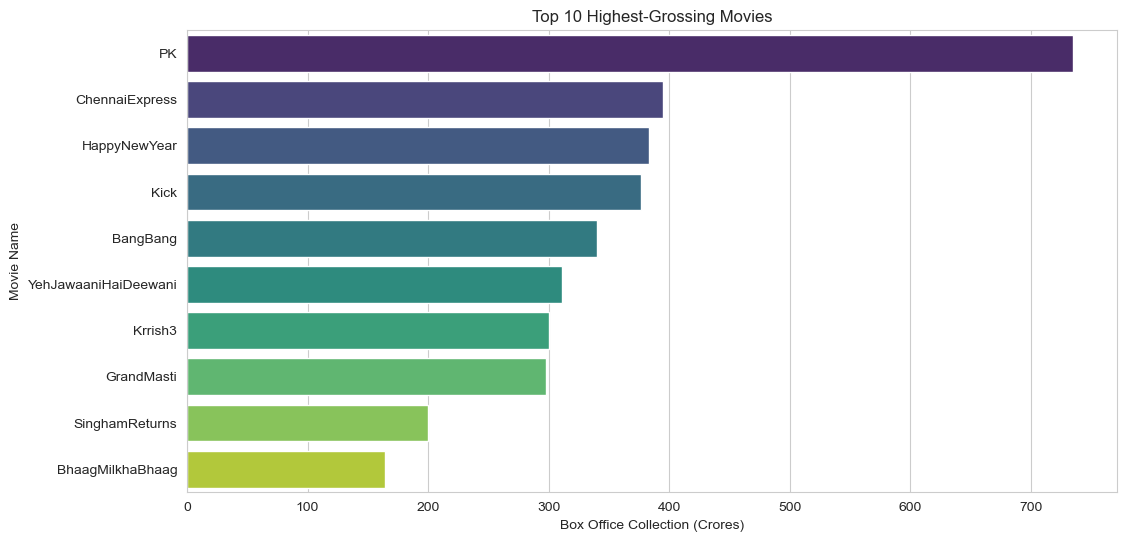

In [8]:
# Top 10 highest-grossing movies
top_movies = df.nlargest(10, 'BoxOfficeCollection')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_movies, x='BoxOfficeCollection', y='MovieName', palette='viridis')
plt.xlabel("Box Office Collection (Crores)")
plt.ylabel("Movie Name")
plt.title("Top 10 Highest-Grossing Movies")
plt.show()

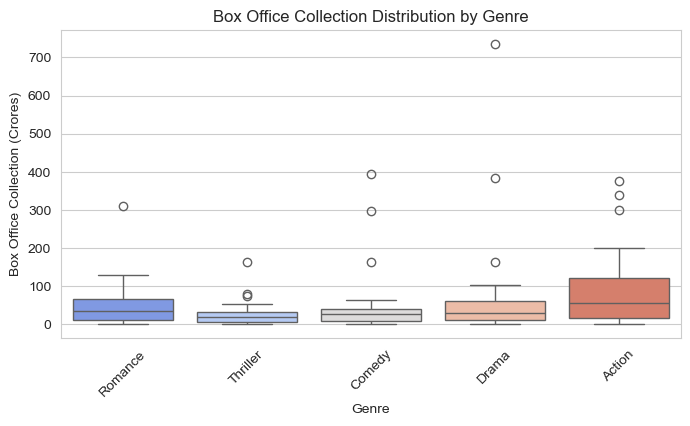

In [9]:
# Box Office Collection by Genre
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Genre', y='BoxOfficeCollection', palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Box Office Collection (Crores)")
plt.title("Box Office Collection Distribution by Genre")
plt.show()

In [10]:
#finding the genre with the highest number of releases during the festive season
df[df.ReleaseTime=='FS'].Genre.value_counts()

Genre
Drama       4
Thriller    4
Action      3
Romance     3
Comedy      3
Name: count, dtype: int64

In [ ]:
# Crosstab method is used to find the release time of movies according to season
# FS- Festive Season
# HS- Holiday Season
# LW- Longweekends
# N- Normal days

In [11]:
pd.crosstab(df.Genre, df.ReleaseTime)

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


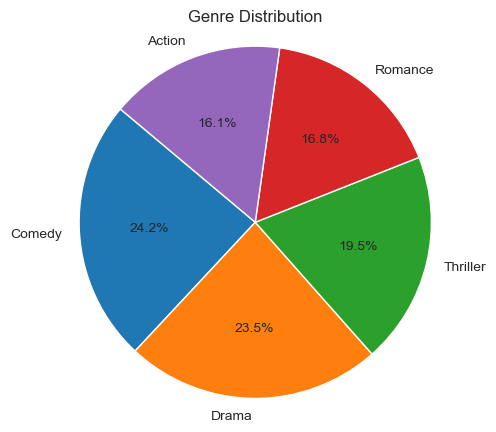

In [12]:
# To visualize the percentage of genres of movies using PieChart
plt.figure(figsize=(5,5))
Genre = df["Genre"].value_counts()
plt.pie(Genre, labels=Genre.index, autopct='%1.1f%%', startangle=140)
plt.title("Genre Distribution")
plt.axis('equal')
plt.show()

In [27]:
# finding the year when the maximum number of movies were released
df.Year.value_counts()

Year
2014    70
2013    67
2015    12
Name: count, dtype: int64

<Axes: xlabel='Year', ylabel='count'>

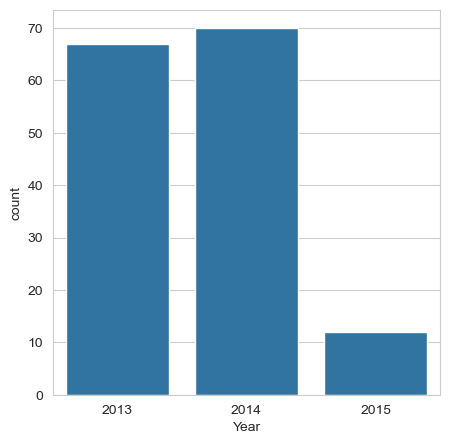

In [14]:
#Visualize the maximum no.of movies released in each year
plt.figure(figsize=(5,5))
sns.countplot(x='Year',data=df)

In [15]:
#finding the month which sees maximum number of high budget movies
df[df.Budget>=30]['ReleaseDate'].dt.month.value_counts()

ReleaseDate
2     8
8     7
1     6
11    6
6     5
7     5
9     4
10    4
4     3
3     3
5     3
12    2
Name: count, dtype: int64

In [16]:
#calculate ROI(Return on Investest
df['ROI']=(df['BoxOfficeCollection']-df['Budget'])/ df['Budget']*100

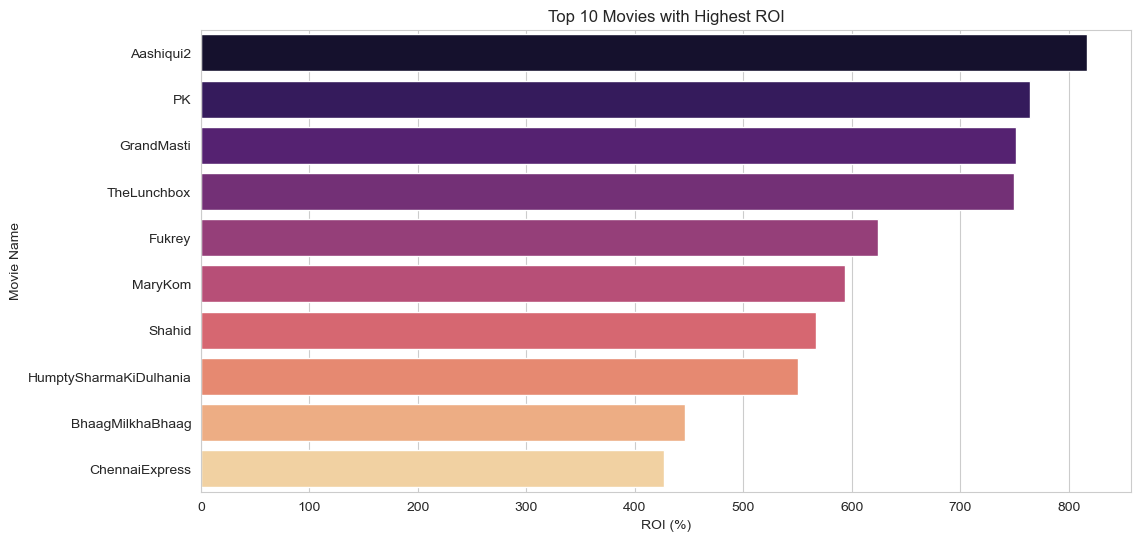

In [17]:
# Top 10 movies with highest ROI
top_roi_movies = df.nlargest(10, 'ROI')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_roi_movies, x='ROI', y='MovieName', palette='magma')
plt.xlabel("ROI (%)")
plt.ylabel("Movie Name")
plt.title("Top 10 Movies with Highest ROI")
plt.show()

In [18]:
# Finding the average of BOC and youtubelikes
corr=df[['BoxOfficeCollection','YoutubeLikes']].corr()
corr

,BoxOfficeCollection,YoutubeLikes
BoxOfficeCollection,1.000000,0.682517
YoutubeLikes,0.682517,1.000000


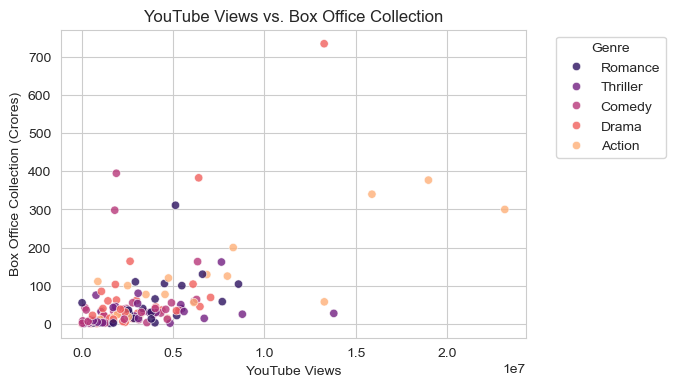

In [19]:
# Scatter plot: YouTube Views vs. Box Office Collection
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='YoutubeViews', y='BoxOfficeCollection', hue='Genre', palette='magma', alpha=0.8)
plt.xlabel("YouTube Views")
plt.ylabel("Box Office Collection (Crores)")
plt.title("YouTube Views vs. Box Office Collection")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Axes: xlabel='Year', ylabel='BoxOfficeCollection'>

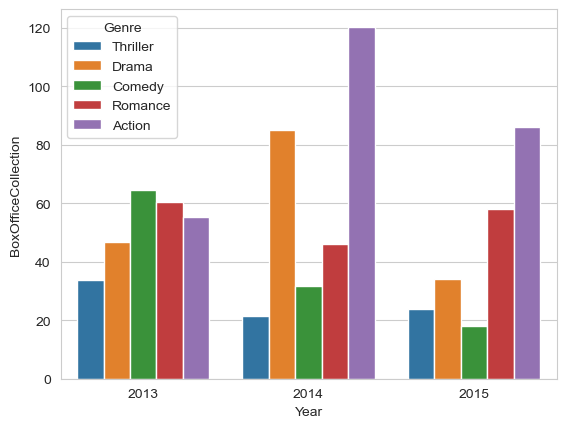

In [20]:
sns.barplot(x='Year',y='BoxOfficeCollection',hue='Genre',data=df,ci=None)

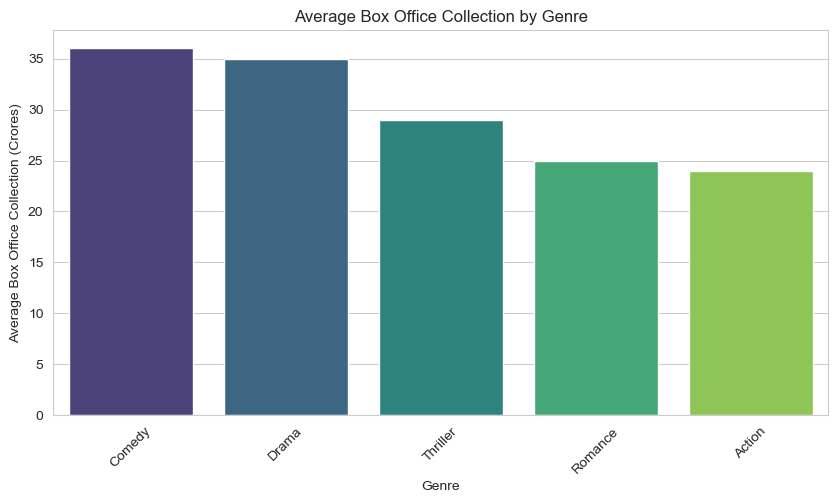

In [21]:
# Plot the average box office collection by genre
plt.figure(figsize=(10, 5))
sns.barplot(x=Genre.index, y=Genre.values, palette="viridis")
plt.xlabel("Genre")
plt.ylabel("Average Box Office Collection (Crores)")
plt.title("Average Box Office Collection by Genre")
plt.xticks(rotation=45)
plt.show()

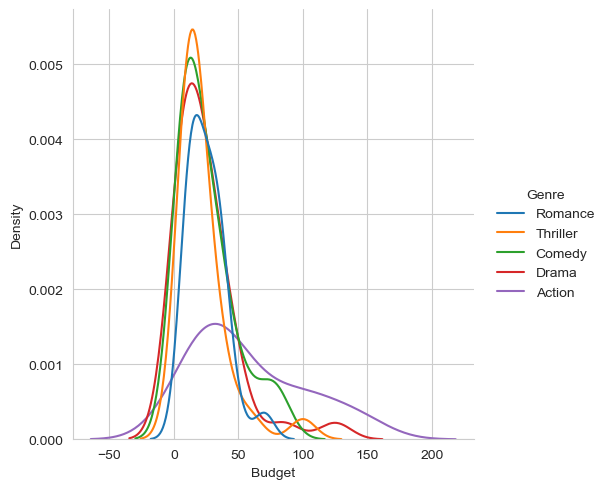

In [22]:
#Visualization of film budget according y
sns.displot(x='Budget',data=df,kind='kde',hue='Genre')

In [23]:
#finding the no of youtube likes every year
likes=df.groupby(by='Year').YoutubeLikes.sum()
#finding the no of Youtube Dislikes every year
dislikes=df.groupby(by='Year').YoutubeDislikes.sum()
print(likes)
print(dislikes)

Year
2013    324180
2014    710142
2015    139431
Name: YoutubeLikes, dtype: int64
Year
2013     58156
2014    104682
2015     17127
Name: YoutubeDislikes, dtype: int64


<Axes: >

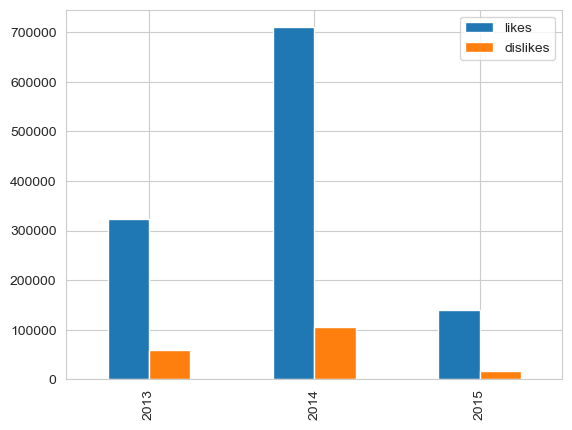

In [24]:
# listing the above results
likes = [324180, 710142, 139431]
dislikes = [58156, 104682, 17127]
year = ['2013', '2014', '2015']
# converting the results into a dataframe
compare = pd.DataFrame({'likes':likes, 'dislikes':dislikes}, index=year)
#plotting the dataframe
compare.plot.bar()

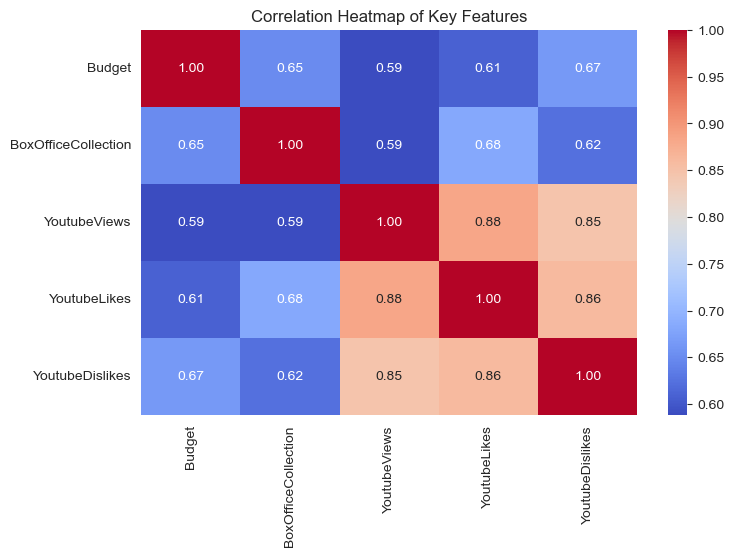

In [25]:
# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Key Features")
plt.show()